In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

import config

In [6]:
plt.style.use([{
    "figure.figsize":(12,9),
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "xx-large",
    "axes.spines.top": False,
    "axes.spines.right": False,
    # "ytick.major.right":False,
    # "xtick.major.top":False
},'seaborn'])

In [7]:
trainset = pd.read_csv(config.bank_additional_train_path, sep=';')

## Clean

In [8]:
y_mapping = {'yes': 1, 
             'no': 0}

poutcome_mapping = {'nonexistent': np.NaN,
                    'failure': 0,
                    'success': 1}

day_of_week_mapping = dict(zip(map(str.lower, calendar.day_abbr), range(7)))

trainset['pdays'].replace(999, np.NaN, inplace=True)

for k, v in y_mapping.items():
    trainset['y'].replace(k, v, inplace=True)
    
for k, v in poutcome_mapping.items():
    trainset['poutcome'].replace(k, v, inplace=True)
    
for k, v in day_of_week_mapping.items():
    trainset['day_of_week'].replace(k, v, inplace=True)

### Validate clean

In [9]:
assert trainset['pdays'].apply(lambda x: isinstance(x, float)).all()
assert trainset['y'].isin(y_mapping.values()).all()
assert trainset['poutcome'].isin(poutcome_mapping.values()).all()
assert trainset['day_of_week'].isin(day_of_week_mapping.values()).all()

In [10]:
trainset = trainset[['day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'y']]
trainset

,day_of_week,campaign,pdays,previous,poutcome,y
0,0,1,NaN,0,NaN,0
1,0,1,NaN,0,NaN,0
2,0,1,NaN,0,NaN,0
3,0,1,NaN,0,NaN,0
4,0,1,NaN,0,NaN,0
...,...,...,...,...,...,...
41183,4,1,NaN,0,NaN,1
41184,4,1,NaN,0,NaN,0
41185,4,2,NaN,0,NaN,0
41186,4,1,NaN,0,NaN,1


# Day of the Week
They never contact people on the weekend:

In [11]:
calendar.day_name[trainset['day_of_week'].max()]

'Friday'

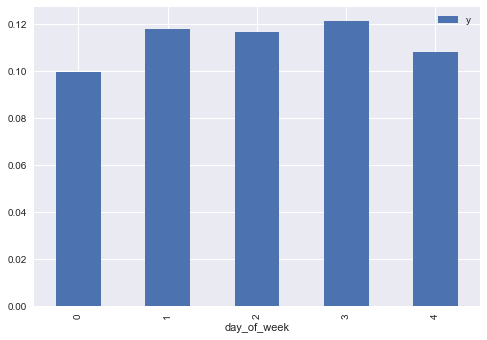

In [12]:
day_of_week_probabilities = trainset[['day_of_week', 'y']].groupby(by='day_of_week').mean()
day_of_week_probabilities.plot.bar()
# TODO: make the plot prettier

# Time between contacts

In [13]:
trainset[['pdays', 'previous', 'poutcome', 'y']]
new_contact_count = trainset['pdays'][trainset['pdays'].notna()].count()